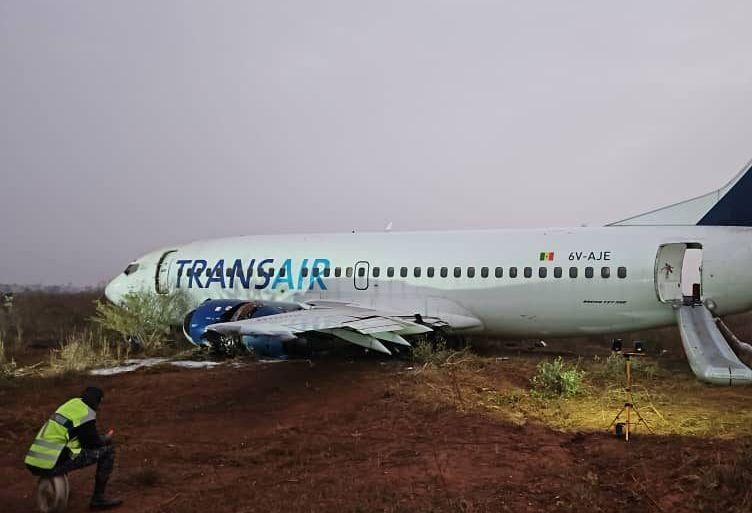

# Problem Statement:

In this project, we aim to develop a machine learning model to classify the severity of aircraft accidents based on historical data. The goal is to accurately predict the severity category of accidents—whether minor, moderate, or severe. Once the model is trained, a predictive function will be built to use this model for predicting the severity of new, unseen accident cases.

# A Multi-Class Classification Approac

In [55]:
#data manipulation
import pandas as pd

# dealing with arrays
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Hyperparametere tuning
from sklearn.model_selection import GridSearchCV

# Save the model
from joblib import dump
from joblib import load

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

importing the necessary libraries which might be used later on.     
note: it is possible to import more libraries as well later on if needed.

In [56]:
df=pd.read_csv('Plane Crashes.csv')
df

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022-05-20,NaN,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Jundiaí – Eldorado do Sul,...,Brazil,South America,2.0,0.0,0.0,0.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown
28532,2022-05-23,18H 29M 0S,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",Celaya - Durango,...,Mexico,Central America,1.0,1.0,1.0,1.0,0.0,2,While approaching Durango Airport on a flight ...,Unknown
28533,2022-05-24,15H 40M 0S,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,...,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown
28534,2022-05-29,10H 7M 0S,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,...,Nepal,Asia,3.0,3.0,19.0,19.0,0.0,22,The twin engine airplane departed Pokhara City...,Human factor


Reading the csv file under the name of: Plane Crashes.csv

# Column Descriptions:

1. **Date**: The date on which the plane crash occurred.
2. **Time**: The specific time of the day when the crash took place, typically in local time.
3. **Aircraft**: The make and model of the aircraft involved in the crash.
4. **Operator**: The airline or organization operating the aircraft at the time of the crash.
5. **Registration**: The unique identification number assigned to the aircraft, often referred to as the tail number.
6. **Flight phase**: The stage of the flight when the crash occurred, such as takeoff, cruising, or landing.
7. **Flight type**: The nature of the flight, such as commercial, cargo, or private.
8. **Survivors**: The number of people who survived the crash.
9. **Crash site**: The specific location or area where the aircraft crashed.
10. **Schedule**: The planned route or schedule of the flight, if applicable.
11. **MSN**: The manufacturer's serial number, a unique identifier for the aircraft.
12. **YOM**: The year of manufacture of the aircraft.
13. **Flight no.**: The flight number assigned to the particular journey.
14. **Crash location**: The geographic location (city, area, or region) where the crash occurred.
15. **Country**: The country where the crash took place.
16. **Region**: The broader geographic region of the crash site, such as continent or area within a country.
17. **Crew on board**: The total number of crew members aboard the aircraft at the time of the crash.
18. **Crew fatalities**: The number of crew members who died in the crash.
19. **Pax on board**: The total number of passengers aboard the aircraft at the time of the crash.
20. **PAX fatalities**: The number of passengers who died in the crash.
21. **Other fatalities**: The number of fatalities on the ground or other non-passenger victims involved in the crash.
22. **Total fatalities**: The total number of fatalities resulting from the crash, including crew, passengers, and others.
23. **Circumstances**: A brief description of the events or conditions leading up to the crash.
24. **Crash cause**: The determined or suspected cause of the crash, such as mechanical failure, weather conditions, or human error.

In [57]:
# Ensure that we are working with a copy of the DataFrame
df = df.copy()

# Create 'Total On Board' column using .loc
df.loc[:, 'Total On Board'] = df['Crew on board'] + df['Pax on board']

# Define a function to classify crash severity
def classify_severity(row):
    if row['Total fatalities'] == 0:
        return 'Minor'
    elif row['Total fatalities'] < 0.25*row['Total On Board']:
        return 'Moderate'
    else:
        return 'Severe'

# Apply the function to create the 'Crash Severity' column
df.loc[:, 'Crash Severity'] = df.apply(classify_severity, axis=1)

Creating a new column in the data called "Crash Severity" in which it will indentify each row if its Minor(no fatalities), Moderate(less than 25% fatalities) and Sever(more than 25% fatalities), i have u chosen 25% as the turning point based on multiple scaling sources and its the best trurning point percentage to produce a great accuracy outcome.

In [58]:
df.head(200)

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause,Total On Board,Crash Severity
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure,2.0,Severe
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,6.0,Severe
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown,2.0,Severe
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure,1.0,Severe
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown,NaN,Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1920-08-28,NaN,Savoia S.16,Regia Marina Italiana,NaN,Flight,Military,Yes,"Plain, Valley",NaN,...,2.0,0.0,0.0,0.0,0.0,0,"Crashed in unknown circumstances, injuring bot...",Unknown,2.0,Minor
196,1920-08-31,NaN,Savoia S.13,Ad Astra Aero,CH-18,Flight,Demonstration,No,"Lake, Sea, Ocean, River",NaN,...,1.0,1.0,0.0,0.0,0.0,1,The pilot Oscar Bereta was completing a demons...,Unknown,1.0,Severe
197,1920-09-01,NaN,Junkers-Larsen JL-6 (Junkers F.13),U.S. Air Mail Service,305,Flight,Postal (mail),No,"Plain, Valley",Hazlehurst – Cleveland,...,2.0,2.0,0.0,0.0,0.0,2,The crew was performing a mail flight from Haz...,Technical failure,2.0,Severe
198,1920-09-05,NaN,De Havilland DH.4,U.S. Air Mail Service,73,Takeoff (climb),Postal (mail),No,Airport (less than 10 km from airport),NaN,...,1.0,1.0,0.0,0.0,0.0,1,"Shortly after takeoff from Cleveland Airport, ...",Technical failure,1.0,Severe


In [59]:
# Convert the 'date_column' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year
df['Year'] = df['Date'].dt.year

# Drop columns that might be less useful or redundant
df = df.drop(columns=['Date','Time','Crash location','Country','Other fatalities','Survivors', 'MSN', 'Registration', 'Flight no.', 'Schedule', 'Circumstances', 'Crash site','Crew fatalities', 'PAX fatalities'])
df

,Aircraft,Operator,Flight phase,Flight type,YOM,Region,Crew on board,Pax on board,Total fatalities,Crash cause,Total On Board,Crash Severity,Year
0,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),Test,NaN,North America,2.0,0.0,2,Technical failure,2.0,Severe,1918
1,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),Test,1918.0,Europe,6.0,0.0,5,Technical failure,6.0,Severe,1918
2,Avro 504,Royal Air Force - RAF,Flight,Training,NaN,Africa,2.0,0.0,1,Unknown,2.0,Severe,1918
3,De Havilland DH.4,United States Signal Corps - USSC,Flight,Military,NaN,North America,1.0,0.0,1,Technical failure,1.0,Severe,1918
4,Breguet 14,French Air Force - Armée de l'Air,Landing (descent or approach),Military,NaN,Europe,NaN,NaN,0,Unknown,NaN,Minor,1918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,Landing (descent or approach),Cargo,1985.0,South America,2.0,0.0,0,Unknown,2.0,Minor,2022
28532,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,Flight,Private,1976.0,Central America,1.0,1.0,2,Unknown,2.0,Severe,2022
28533,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),1965.0,North America,1.0,3.0,0,Unknown,4.0,Minor,2022
28534,De Havilland DHC-6 Twin Otter,Tara Air,Flight,Scheduled Revenue Flight,1979.0,Asia,3.0,19.0,22,Human factor,22.0,Severe,2022


Here i eleminated the day and the month from the Date column and i only took the year and put it in a new column, since day and month wont be of any use in the data's outcome, as well as i removed unnecessary columns which will contribute to the data's outcome as well as they might decrease the accuracy if left in the dataset.

In [60]:
#rearranging column's position in a better structured way
new_order=['Year','YOM','Region','Aircraft','Operator','Flight phase','Flight type','Crash cause','Crew on board','Pax on board','Total On Board','Total fatalities','Crash Severity']
df=df[new_order]
df.head(150)

,Year,YOM,Region,Aircraft,Operator,Flight phase,Flight type,Crash cause,Crew on board,Pax on board,Total On Board,Total fatalities,Crash Severity
0,1918,NaN,North America,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),Test,Technical failure,2.0,0.0,2.0,2,Severe
1,1918,1918.0,Europe,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),Test,Technical failure,6.0,0.0,6.0,5,Severe
2,1918,NaN,Africa,Avro 504,Royal Air Force - RAF,Flight,Training,Unknown,2.0,0.0,2.0,1,Severe
3,1918,NaN,North America,De Havilland DH.4,United States Signal Corps - USSC,Flight,Military,Technical failure,1.0,0.0,1.0,1,Severe
4,1918,NaN,Europe,Breguet 14,French Air Force - Armée de l'Air,Landing (descent or approach),Military,Unknown,NaN,NaN,NaN,0,Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1920,NaN,Europe,Felixstowe F.5,Royal Air Force - RAF,Takeoff (climb),Training,Unknown,6.0,0.0,6.0,4,Severe
146,1920,1919.0,Europe,Avro 504,Vickers-Armstrongs Ltd,Takeoff (climb),Training,Unknown,1.0,0.0,1.0,0,Minor
147,1920,NaN,North America,De Havilland DH.4,U.S. Air Mail Service,Flight,Postal (mail),Technical failure,1.0,0.0,1.0,0,Minor
148,1920,NaN,North America,De Havilland DH.4,U.S. Air Mail Service,Flight,Postal (mail),Human factor,1.0,1.0,2.0,1,Severe


Here the columns of the data were rearranged in a structural organized way so it will be easier to understand the data.

In [61]:
# Drop rows with missing values in critical columns
df = df.dropna(subset=['Crew on board', 'Pax on board'])
df

,Year,YOM,Region,Aircraft,Operator,Flight phase,Flight type,Crash cause,Crew on board,Pax on board,Total On Board,Total fatalities,Crash Severity
0,1918,NaN,North America,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),Test,Technical failure,2.0,0.0,2.0,2,Severe
1,1918,1918.0,Europe,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),Test,Technical failure,6.0,0.0,6.0,5,Severe
2,1918,NaN,Africa,Avro 504,Royal Air Force - RAF,Flight,Training,Unknown,2.0,0.0,2.0,1,Severe
3,1918,NaN,North America,De Havilland DH.4,United States Signal Corps - USSC,Flight,Military,Technical failure,1.0,0.0,1.0,1,Severe
5,1918,NaN,Europe,Fairey III,Marine Aeroplane Depot,Landing (descent or approach),Delivery,Unknown,1.0,0.0,1.0,1,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022,1985.0,South America,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,Landing (descent or approach),Cargo,Unknown,2.0,0.0,2.0,0,Minor
28532,2022,1976.0,Central America,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,Flight,Private,Unknown,1.0,1.0,2.0,2,Severe
28533,2022,1965.0,North America,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Unknown,1.0,3.0,4.0,0,Minor
28534,2022,1979.0,Asia,De Havilland DHC-6 Twin Otter,Tara Air,Flight,Scheduled Revenue Flight,Human factor,3.0,19.0,22.0,22,Severe


Missing values were dropped from critical columns

## Understand the Dataset:

### - Check Data Types:

In [62]:
df.dtypes

Year                  int32
YOM                 float64
Region               object
Aircraft             object
Operator             object
Flight phase         object
Flight type          object
Crash cause          object
Crew on board       float64
Pax on board        float64
Total On Board      float64
Total fatalities      int64
Crash Severity       object
dtype: object

### - Summary Statistics for Numerical Values:

In [63]:
df.describe()

,Year,YOM,Crew on board,Pax on board,Total On Board,Total fatalities
count,28479.000000,23195.000000,28479.000000,28479.000000,28479.000000,28479.000000
mean,1967.768496,1931.914033,3.052073,7.706205,10.758278,5.577092
std,25.756701,285.668661,11.744628,24.067506,27.737191,16.728376
min,1918.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1945.000000,1944.000000,1.000000,0.000000,2.000000,0.000000
50%,1967.000000,1958.000000,2.000000,0.000000,4.000000,1.000000
75%,1988.000000,1974.000000,4.000000,4.000000,8.000000,5.000000
max,2022.000000,19567.000000,1924.000000,509.000000,1924.000000,520.000000


## Data Preperation:

### - Checking for Missing Values

In [64]:
# Check for missing values
missing_values=df.isnull().sum()
missing_values

Year                   0
YOM                 5284
Region                 1
Aircraft               1
Operator               0
Flight phase         629
Flight type           57
Crash cause            0
Crew on board          0
Pax on board           0
Total On Board         0
Total fatalities       0
Crash Severity         0
dtype: int64

### - Handling Missing Values:

#### For Region and Aircraft

In [65]:
df=df.dropna(subset=['Region','Aircraft'])
df

,Year,YOM,Region,Aircraft,Operator,Flight phase,Flight type,Crash cause,Crew on board,Pax on board,Total On Board,Total fatalities,Crash Severity
0,1918,NaN,North America,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),Test,Technical failure,2.0,0.0,2.0,2,Severe
1,1918,1918.0,Europe,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),Test,Technical failure,6.0,0.0,6.0,5,Severe
2,1918,NaN,Africa,Avro 504,Royal Air Force - RAF,Flight,Training,Unknown,2.0,0.0,2.0,1,Severe
3,1918,NaN,North America,De Havilland DH.4,United States Signal Corps - USSC,Flight,Military,Technical failure,1.0,0.0,1.0,1,Severe
5,1918,NaN,Europe,Fairey III,Marine Aeroplane Depot,Landing (descent or approach),Delivery,Unknown,1.0,0.0,1.0,1,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022,1985.0,South America,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,Landing (descent or approach),Cargo,Unknown,2.0,0.0,2.0,0,Minor
28532,2022,1976.0,Central America,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,Flight,Private,Unknown,1.0,1.0,2.0,2,Severe
28533,2022,1965.0,North America,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Unknown,1.0,3.0,4.0,0,Minor
28534,2022,1979.0,Asia,De Havilland DHC-6 Twin Otter,Tara Air,Flight,Scheduled Revenue Flight,Human factor,3.0,19.0,22.0,22,Severe


#### For YOM

In [66]:
# Compute the median year of manufacture for each model
model_year_median = df.groupby('Year')['YOM'].median()

# Define a function to impute based on model
def impute_year(row):
    if pd.isna(row['YOM']):
        return model_year_median.get(row['Year'], row['YOM'])  # Use the median or keep the original if no median is found
    return row['YOM']

# Apply the imputation
df['YOM'] = df.apply(impute_year, axis=1)

df.head(100)

,Year,YOM,Region,Aircraft,Operator,Flight phase,Flight type,Crash cause,Crew on board,Pax on board,Total On Board,Total fatalities,Crash Severity
0,1918,1918.0,North America,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),Test,Technical failure,2.0,0.0,2.0,2,Severe
1,1918,1918.0,Europe,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),Test,Technical failure,6.0,0.0,6.0,5,Severe
2,1918,1918.0,Africa,Avro 504,Royal Air Force - RAF,Flight,Training,Unknown,2.0,0.0,2.0,1,Severe
3,1918,1918.0,North America,De Havilland DH.4,United States Signal Corps - USSC,Flight,Military,Technical failure,1.0,0.0,1.0,1,Severe
5,1918,1918.0,Europe,Fairey III,Marine Aeroplane Depot,Landing (descent or approach),Delivery,Unknown,1.0,0.0,1.0,1,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,1919,1919.0,Europe,Vickers Viking (Serie I/II/III & IV),Vickers-Armstrongs Ltd,Flight,Positioning,Unknown,1.0,0.0,1.0,1,Severe
105,1919,1919.0,Europe,Avro 504,Central Aircraft Company,Landing (descent or approach),Scheduled Revenue Flight,Unknown,1.0,0.0,1.0,0,Minor
106,1919,1919.0,Europe,Avro 504,T. D. Lewis,Flight,Private,Unknown,1.0,0.0,1.0,0,Minor
107,1919,1919.0,North America,De Havilland DH.4,United States Army Air Service - USAAS,NaN,Military,Unknown,0.0,0.0,0.0,0,Minor


Here it wasnt wise to drop the rows with missing values in column YOM since the missing values in YOM is farely big 5284 value to be exact which will lead to losing alot of data needed for later on if dropped, instead imputation based on model was used and it was grouped by the year column and its median, which makes since if you check the results.

#### For Flight phase And Flight type

In [67]:
from sklearn.impute import SimpleImputer

# Create an imputer for categorical data
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values
df[['Flight phase', 'Flight type']] = imputer.fit_transform(df[['Flight phase', 'Flight type']])

df

,Year,YOM,Region,Aircraft,Operator,Flight phase,Flight type,Crash cause,Crew on board,Pax on board,Total On Board,Total fatalities,Crash Severity
0,1918,1918.0,North America,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),Test,Technical failure,2.0,0.0,2.0,2,Severe
1,1918,1918.0,Europe,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),Test,Technical failure,6.0,0.0,6.0,5,Severe
2,1918,1918.0,Africa,Avro 504,Royal Air Force - RAF,Flight,Training,Unknown,2.0,0.0,2.0,1,Severe
3,1918,1918.0,North America,De Havilland DH.4,United States Signal Corps - USSC,Flight,Military,Technical failure,1.0,0.0,1.0,1,Severe
5,1918,1918.0,Europe,Fairey III,Marine Aeroplane Depot,Landing (descent or approach),Delivery,Unknown,1.0,0.0,1.0,1,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022,1985.0,South America,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,Landing (descent or approach),Cargo,Unknown,2.0,0.0,2.0,0,Minor
28532,2022,1976.0,Central America,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,Flight,Private,Unknown,1.0,1.0,2.0,2,Severe
28533,2022,1965.0,North America,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Unknown,1.0,3.0,4.0,0,Minor
28534,2022,1979.0,Asia,De Havilland DHC-6 Twin Otter,Tara Air,Flight,Scheduled Revenue Flight,Human factor,3.0,19.0,22.0,22,Severe


Here since the missing values are in a categorical columns so its pretty much straight forward to use simple imputer to fill in the missing values.

### - Check for duplicate rows:

In [68]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
duplicates

849

In [69]:
duplicates = df.duplicated()
df[duplicates]

,Year,YOM,Region,Aircraft,Operator,Flight phase,Flight type,Crash cause,Crew on board,Pax on board,Total On Board,Total fatalities,Crash Severity
33,1919,1919.0,North America,De Havilland DH.4,U.S. Air Mail Service,Flight,Postal (mail),Weather,0.0,0.0,0.0,0,Minor
39,1919,1919.0,North America,De Havilland DH.4,United States Army Air Service - USAAS,Flight,Military,Unknown,0.0,0.0,0.0,0,Minor
41,1919,1919.0,North America,De Havilland DH.4,United States Army Air Service - USAAS,Flight,Military,Unknown,0.0,0.0,0.0,0,Minor
50,1919,1919.0,North America,De Havilland DH.4,United States Army Air Service - USAAS,Flight,Military,Unknown,0.0,0.0,0.0,0,Minor
52,1919,1919.0,North America,De Havilland DH.4,U.S. Air Mail Service,Flight,Postal (mail),Technical failure,0.0,0.0,0.0,0,Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22477,1992,1970.0,Asia,PZL-Mielec AN-2,TyumenAviaTrans,Flight,Scheduled Revenue Flight,Unknown,0.0,0.0,0.0,0,Minor
22591,1992,1969.0,Asia,PZL-Mielec AN-2,Aeroflot - Russian International Airlines,Flight,Scheduled Revenue Flight,Unknown,0.0,0.0,0.0,0,Minor
24216,1998,1962.0,Asia,Lockheed C-130 Hercules,Pakistan Air Force - Pakistan Fiza'ya,Parking,Military,Technical failure,0.0,0.0,0.0,0,Minor
24295,1998,1978.0,Europe,PZL-Mielec AN-2,Aeroklub Zrenjanin,Flight,Scheduled Revenue Flight,Unknown,0.0,0.0,0.0,0,Minor


#### Removing duplicate row

In [70]:
# Remove duplicated rows
df= df.drop_duplicates()
df

,Year,YOM,Region,Aircraft,Operator,Flight phase,Flight type,Crash cause,Crew on board,Pax on board,Total On Board,Total fatalities,Crash Severity
0,1918,1918.0,North America,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),Test,Technical failure,2.0,0.0,2.0,2,Severe
1,1918,1918.0,Europe,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),Test,Technical failure,6.0,0.0,6.0,5,Severe
2,1918,1918.0,Africa,Avro 504,Royal Air Force - RAF,Flight,Training,Unknown,2.0,0.0,2.0,1,Severe
3,1918,1918.0,North America,De Havilland DH.4,United States Signal Corps - USSC,Flight,Military,Technical failure,1.0,0.0,1.0,1,Severe
5,1918,1918.0,Europe,Fairey III,Marine Aeroplane Depot,Landing (descent or approach),Delivery,Unknown,1.0,0.0,1.0,1,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022,1985.0,South America,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,Landing (descent or approach),Cargo,Unknown,2.0,0.0,2.0,0,Minor
28532,2022,1976.0,Central America,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,Flight,Private,Unknown,1.0,1.0,2.0,2,Severe
28533,2022,1965.0,North America,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Unknown,1.0,3.0,4.0,0,Minor
28534,2022,1979.0,Asia,De Havilland DHC-6 Twin Otter,Tara Air,Flight,Scheduled Revenue Flight,Human factor,3.0,19.0,22.0,22,Severe


In [71]:
# Verify no more duplicates
no_duplicates = df.duplicated().sum()
print(f"Number of remaining duplicates: {no_duplicates}")

Number of remaining duplicates: 0


#### Convert Float to integers

In [72]:
df['YOM'] = df['YOM'].astype(int)
df['Crew on board'] = df['Crew on board'].astype(int)
df['Pax on board'] = df['Pax on board'].astype(int)
df['Total On Board'] = df['Total On Board'].astype(int)
df

,Year,YOM,Region,Aircraft,Operator,Flight phase,Flight type,Crash cause,Crew on board,Pax on board,Total On Board,Total fatalities,Crash Severity
0,1918,1918,North America,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),Test,Technical failure,2,0,2,2,Severe
1,1918,1918,Europe,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),Test,Technical failure,6,0,6,5,Severe
2,1918,1918,Africa,Avro 504,Royal Air Force - RAF,Flight,Training,Unknown,2,0,2,1,Severe
3,1918,1918,North America,De Havilland DH.4,United States Signal Corps - USSC,Flight,Military,Technical failure,1,0,1,1,Severe
5,1918,1918,Europe,Fairey III,Marine Aeroplane Depot,Landing (descent or approach),Delivery,Unknown,1,0,1,1,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022,1985,South America,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,Landing (descent or approach),Cargo,Unknown,2,0,2,0,Minor
28532,2022,1976,Central America,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,Flight,Private,Unknown,1,1,2,2,Severe
28533,2022,1965,North America,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Unknown,1,3,4,0,Minor
28534,2022,1979,Asia,De Havilland DHC-6 Twin Otter,Tara Air,Flight,Scheduled Revenue Flight,Human factor,3,19,22,22,Severe


The conversion of the float variables to integers was conducted to make the process of the machine learning easier, to avoid confusion and to give accurate outcomes later on.

### Find unique values for each categorical column (cardinality):

In [73]:
def check_categorical_unique(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        unique_values = df[col].unique()
        cardinality = len(unique_values)
        print(f"Column '{col}':")
        print(f"  Unique values: {unique_values}")
        print(f"  Cardinality: {cardinality}\n")

# Call the function
check_categorical_unique(df)

Column 'Region':
  Unique values: ['North America' 'Europe' 'Africa' 'Central America' 'Asia' 'World'
 'South America' 'Oceania' 'Antarctica']
  Cardinality: 9

Column 'Aircraft':
  Unique values: ['De Havilland DH.4' 'Handley Page V/1500' 'Avro 504' ...
 'Cirrus Vision SF50' 'Socata TBM-910' 'Learjet 75']
  Cardinality: 1118

Column 'Operator':
  Unique values: ['United States Signal Corps - USSC' 'Handley Page Aircraft Company Ltd'
 'Royal Air Force - RAF' ... 'Raul Ignacion Posada'
 'Yakutat Coastal Airlines' 'GoJump Oceanside']
  Cardinality: 8954

Column 'Flight phase':
  Unique values: ['Takeoff (climb)' 'Flight' 'Landing (descent or approach)' 'Taxiing'
 'Parking']
  Cardinality: 5

Column 'Flight type':
  Unique values: ['Test' 'Training' 'Military' 'Delivery'
 'Survey / Patrol / Reconnaissance' 'Postal (mail)' 'Ferry'
 'Aerial photography' 'Scheduled Revenue Flight' 'Government' 'Private'
 'Charter/Taxi (Non Scheduled Revenue Flight)' 'Cargo' 'Positioning'
 'Demonstration' 'Am

Finding the unique values of the categorical columns will help us understand the data and its values more, as well as it will be a great push for us which will be used in the EDA for data analysis

## EDA (for data analysis)

### -Histograms for:
#### year, YOM , and Total on Board with respect to Total fatalities

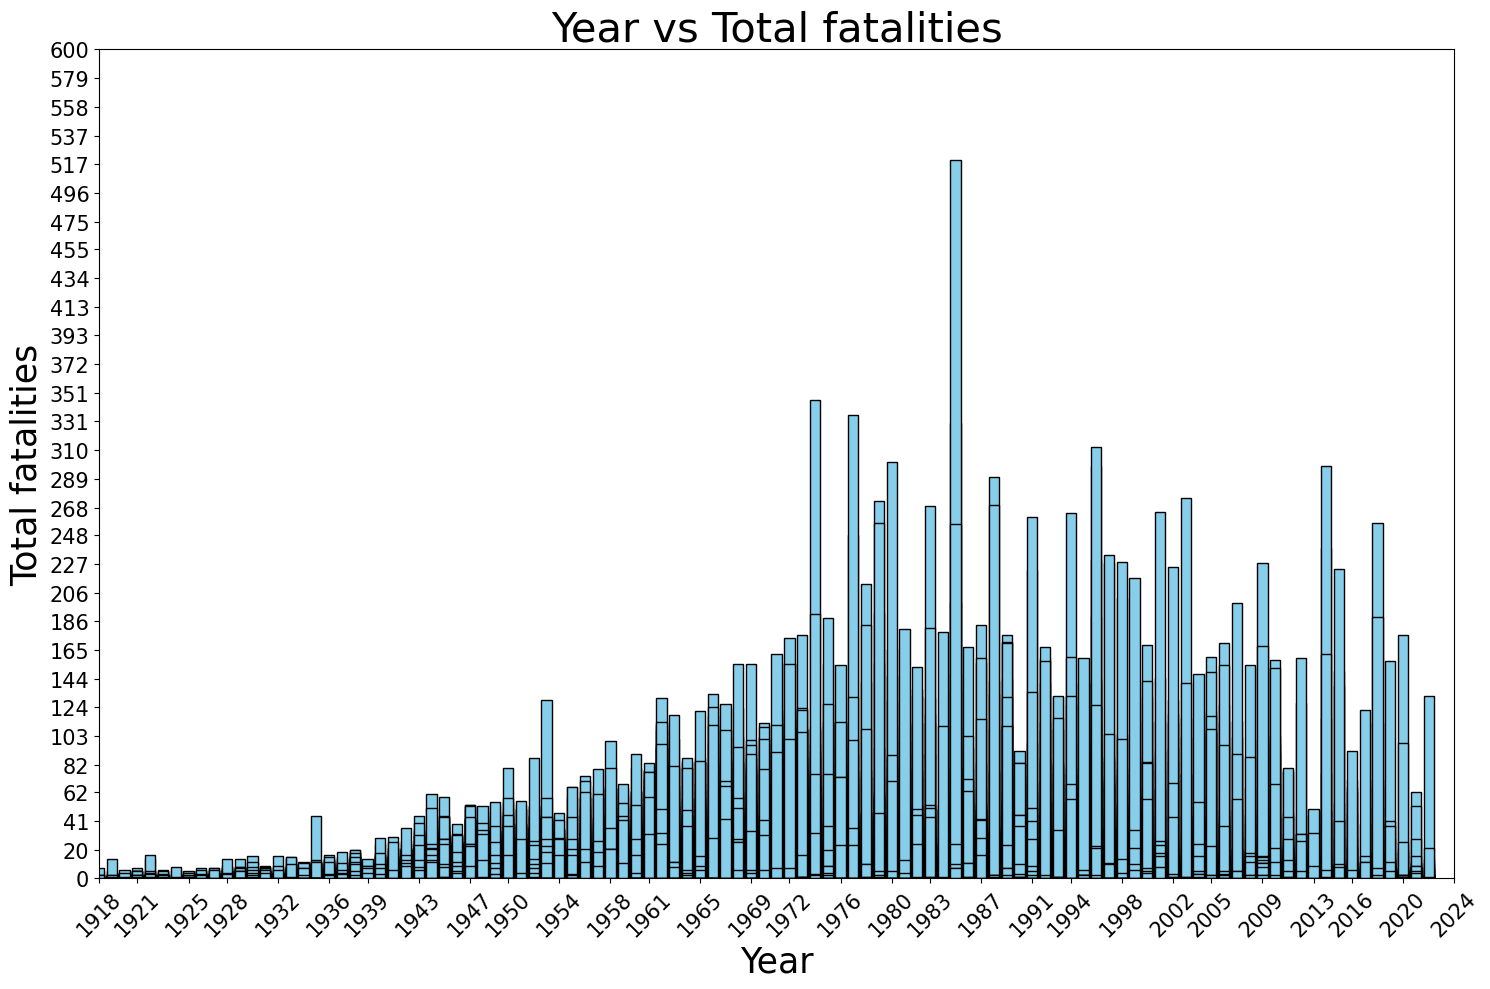

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Column to plot
column_to_plot = 'Year'

# Create a new figure
plt.figure(figsize=(15, 10))  # Adjust size as needed

# Plot bar graph
plt.bar(df[column_to_plot], df['Total fatalities'], color='skyblue', edgecolor='black')

# Set title and labels
plt.title(f'{column_to_plot} vs Total fatalities', fontsize=30)
plt.xlabel(column_to_plot, fontsize=25)
plt.ylabel('Total fatalities', fontsize=25)

# Set axis limits
plt.xlim(1918, 2024)  # Set x-axis limits
plt.ylim(0, 600)      # Set y-axis limits

# Generate integer ticks for x-axis and y-axis
x_ticks = np.linspace(1918, 2024, num=30).astype(int)  # Generate 30 integer x-axis ticks
y_ticks = np.linspace(0, 600, num=30).astype(int)      # Generate 30 integer y-axis ticks

# Set ticks on both axes
plt.xticks(x_ticks, rotation=45)  # Rotate x-axis ticks if necessary
plt.yticks(y_ticks)

# Ensure ticks are integers
plt.gca().xaxis.set_major_locator(plt.FixedLocator(x_ticks))  # Set x-axis ticks to integer values
plt.gca().yaxis.set_major_locator(plt.FixedLocator(y_ticks))  # Set y-axis ticks to integer values

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=15)  # Adjust tick label size

# Show the figure
plt.tight_layout()
plt.show()





Here the histogram shows an increase in the number of fatalities as time progresses especially after the 1960s where commercial flights started to become popular and booming.

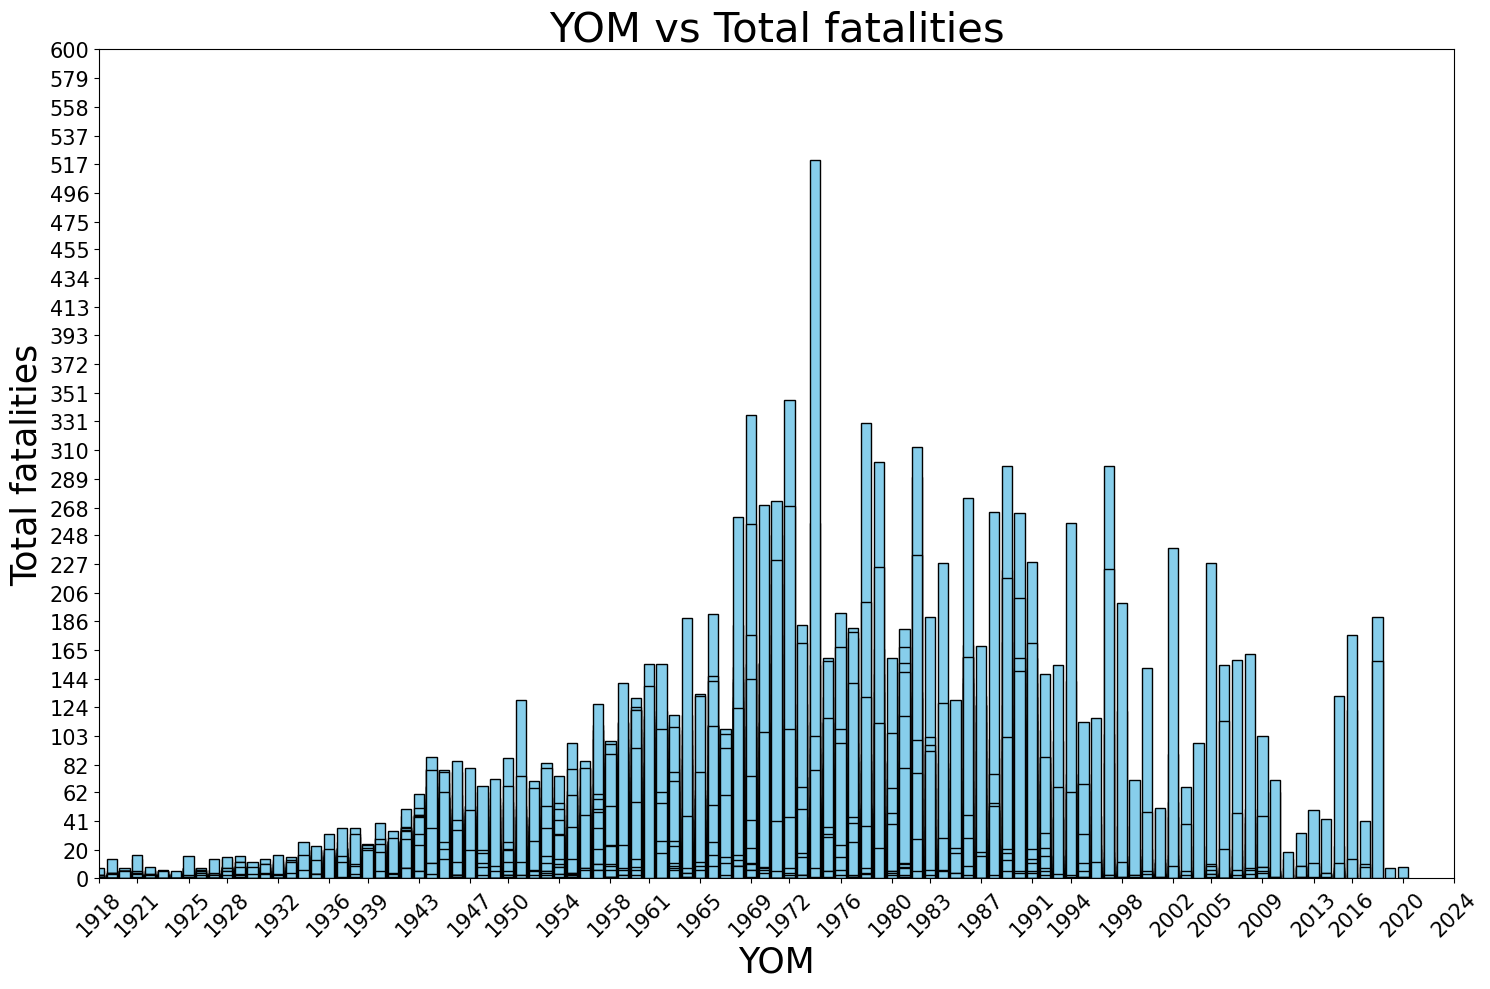

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Column to plot
column_to_plot = 'YOM'

# Create a new figure
plt.figure(figsize=(15, 10))  # Adjust size as needed

# Plot bar graph
plt.bar(df[column_to_plot], df['Total fatalities'], color='skyblue', edgecolor='black')

# Set title and labels
plt.title(f'{column_to_plot} vs Total fatalities', fontsize=30)
plt.xlabel(column_to_plot, fontsize=25)
plt.ylabel('Total fatalities', fontsize=25)

# Set axis limits
plt.xlim(1918, 2024)  # Set x-axis limits
plt.ylim(0, 600)      # Set y-axis limits

# Generate integer ticks for x-axis and y-axis
x_ticks = np.linspace(1918, 2024, num=30).astype(int)  # Generate 30 integer x-axis ticks
y_ticks = np.linspace(0, 600, num=30).astype(int)      # Generate 30 integer y-axis ticks

# Set ticks on both axes
plt.xticks(x_ticks, rotation=45)  # Rotate x-axis ticks if necessary
plt.yticks(y_ticks)

# Ensure ticks are integers
plt.gca().xaxis.set_major_locator(plt.FixedLocator(x_ticks))  # Set x-axis ticks to integer values
plt.gca().yaxis.set_major_locator(plt.FixedLocator(y_ticks))  # Set y-axis ticks to integer values

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=15)  # Adjust tick label size

# Show the figure
plt.tight_layout()
plt.show()


This histogram figure shows Total fatalities with respect to year of manufacturing (YOM), which basically  in the time between the mid 1950s and 1960s when commercial flight started booming and new technologies as well as systems were introduced to aviation, this made a room for more plane crashes which in return increases the outcome of more fatalities , which in one way or another is reasonable since in general if you introduce new technologies to a machine , it will take sometime and frequent flights until the new system shows its faults and errors.

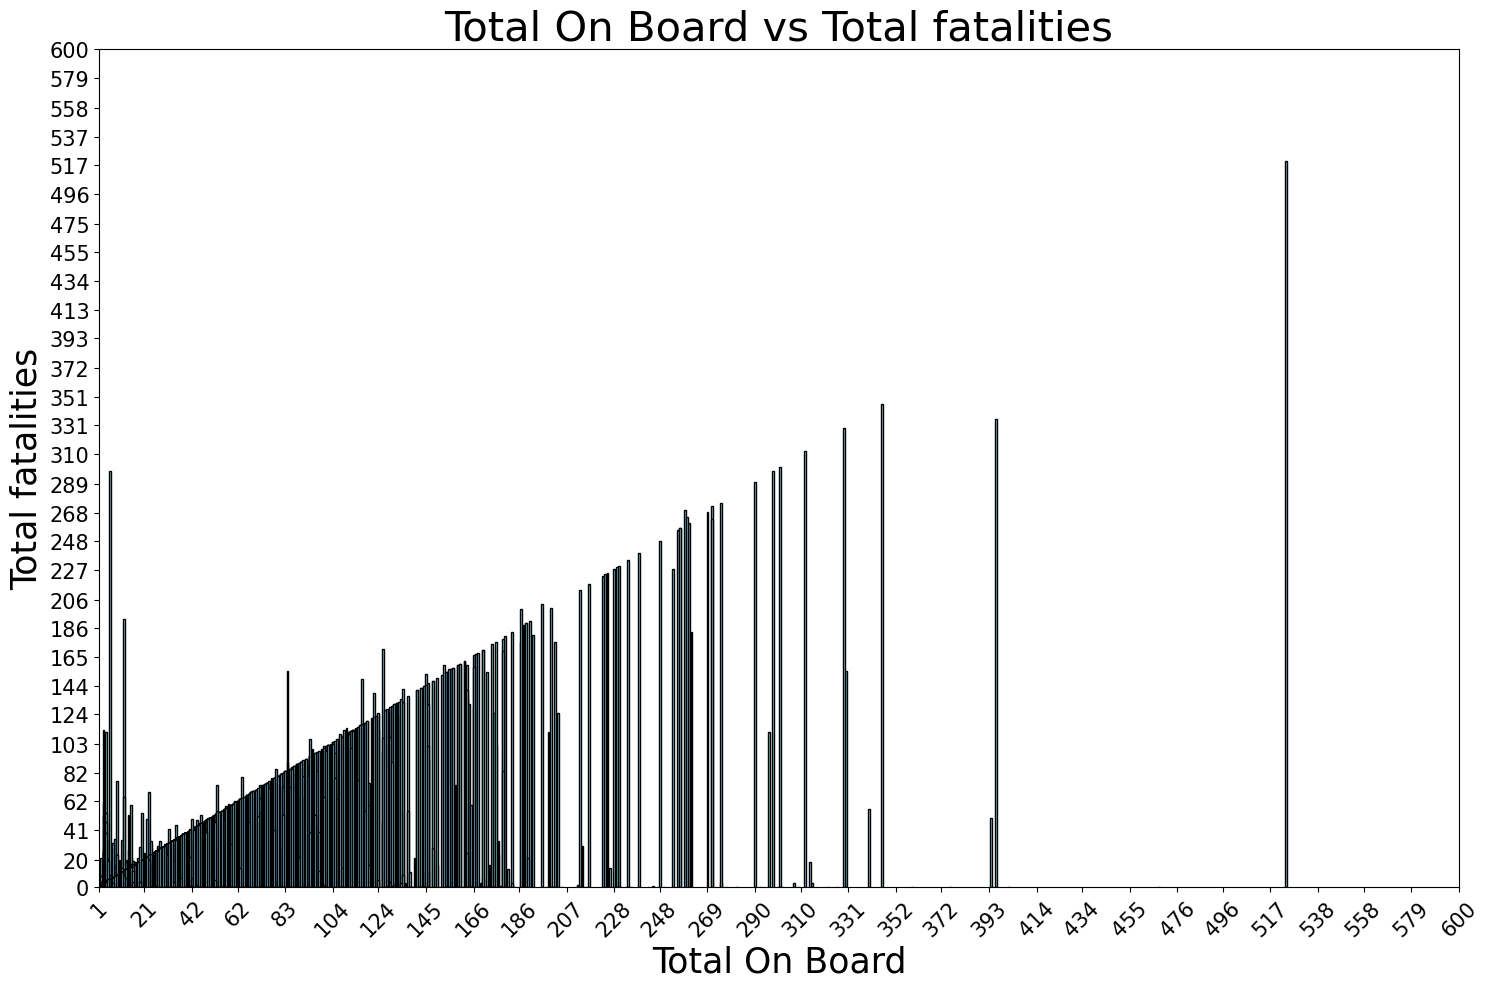

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Column to plot
column_to_plot = 'Total On Board'

# Create a new figure
plt.figure(figsize=(15, 10))  # Adjust size as needed

# Plot bar graph
plt.bar(df[column_to_plot], df['Total fatalities'], color='skyblue', edgecolor='black')

# Set title and labels
plt.title(f'{column_to_plot} vs Total fatalities', fontsize=30)
plt.xlabel(column_to_plot, fontsize=25)
plt.ylabel('Total fatalities', fontsize=25)

# Set axis limits
plt.xlim(1, 600)  # Set x-axis limits
plt.ylim(0, 600)      # Set y-axis limits

# Generate integer ticks for x-axis and y-axis
x_ticks = np.linspace(1, 600, num=30).astype(int)  # Generate 30 integer x-axis ticks
y_ticks = np.linspace(0, 600, num=30).astype(int)      # Generate 30 integer y-axis ticks

# Set ticks on both axes
plt.xticks(x_ticks, rotation=45)  # Rotate x-axis ticks if necessary
plt.yticks(y_ticks)

# Ensure ticks are integers
plt.gca().xaxis.set_major_locator(plt.FixedLocator(x_ticks))  # Set x-axis ticks to integer values
plt.gca().yaxis.set_major_locator(plt.FixedLocator(y_ticks))  # Set y-axis ticks to integer values

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=15)  # Adjust tick label size

# Show the figure
plt.tight_layout()
plt.show()



This is basically straight forward as the number of people on board increases the number of fatalities increases if a crash happens which makes sense.

### -Bar Graphs for:
#### Top 10 Aircraft Types, Top 10 Operator , and Top 10 Flight type with respect to Total fatalities

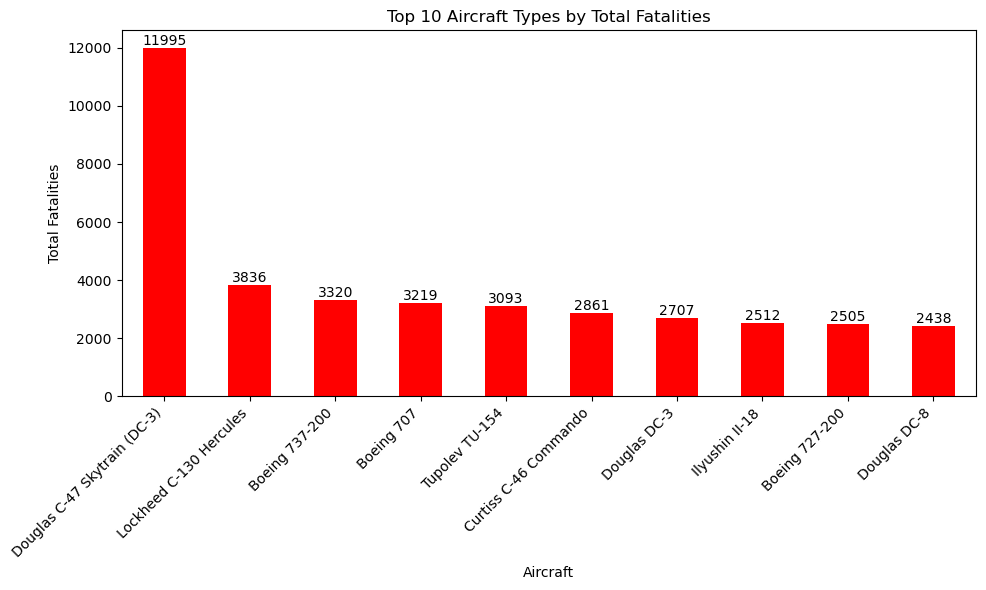

In [77]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'Aircraft' and sum 'Total fatalities'
grouped_df = df.groupby('Aircraft')['Total fatalities'].sum()

# Sort by 'Total fatalities' in descending order and get the top 10
top_10_aircraft = grouped_df.sort_values(ascending=False).head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = top_10_aircraft.plot(kind='bar', color='red')

# Add value labels on each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.0f}',
        ha='center',
        va='bottom'
    )

plt.title('Top 10 Aircraft Types by Total Fatalities')
plt.xlabel('Aircraft')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


The bar graph shows the top 10 Aircrafts with the most amount of fatalities in descending order.
note: this graph doesnt take into consideration if the amount of fatalities are due to frequent crashes or not, meaning an aircraft could have had alot of fatalities number due to the fact it had alot of people on board when the crashes happened and not due to the fact these aircrafts had frequent crashes.

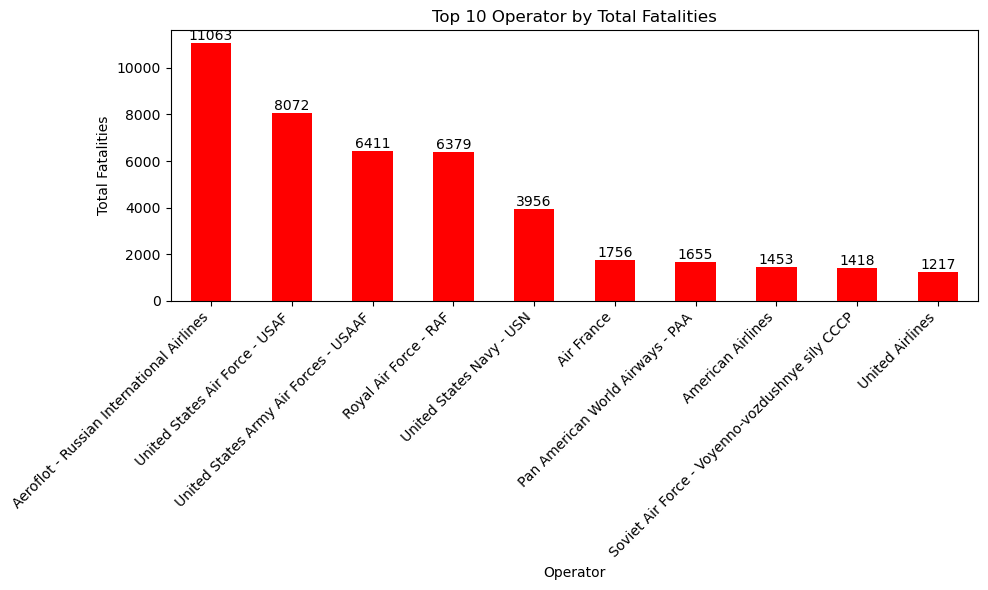

In [78]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'Aircraft' and sum 'Total fatalities'
grouped_df = df.groupby('Operator')['Total fatalities'].sum()

# Sort by 'Total fatalities' in descending order and get the top 10
top_10_aircraft = grouped_df.sort_values(ascending=False).head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = top_10_aircraft.plot(kind='bar', color='red')

# Add value labels on each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.0f}',
        ha='center',
        va='bottom'
    )

plt.title('Top 10 Operator by Total Fatalities')
plt.xlabel('Operator')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Here the bar graph shows the top 10 operators in descending order with respect to the total fatalities summed up/operator

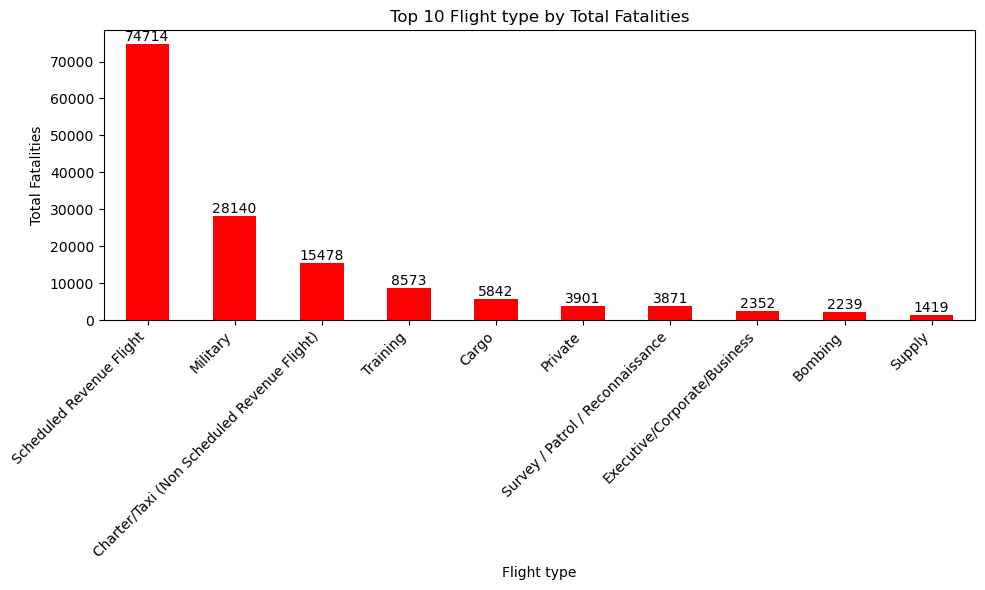

In [79]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'Aircraft' and sum 'Total fatalities'
grouped_df = df.groupby('Flight type')['Total fatalities'].sum()

# Sort by 'Total fatalities' in descending order and get the top 10
top_10_aircraft = grouped_df.sort_values(ascending=False).head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = top_10_aircraft.plot(kind='bar', color='red')

# Add value labels on each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.0f}',
        ha='center',
        va='bottom'
    )

plt.title('Top 10 Flight type by Total Fatalities')
plt.xlabel('Flight type')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Here the bar graph shows the top 10 flight type with respect to total fatalities summed up/flight type

### -Pie Charts for:
#### Total fatalities by Region, Total fatalities by Flight phase, and Total fatalities by Crash cause

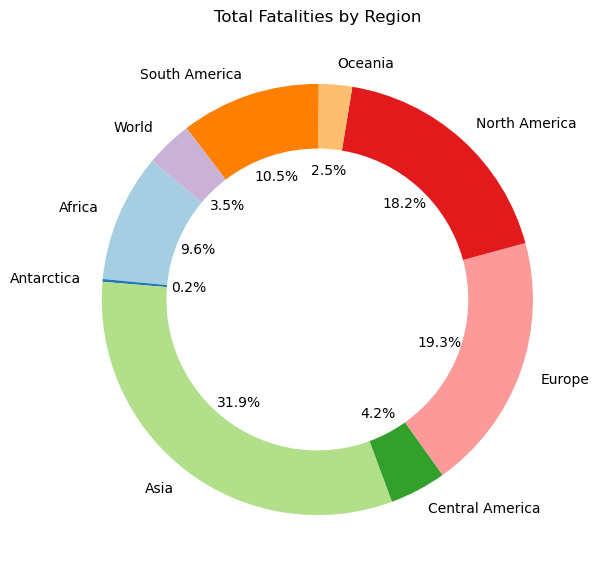

In [80]:
# Aggregate total fatalities by Region
region_fatalities = df.groupby('Region')['Total fatalities'].sum()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(region_fatalities, 
        labels=region_fatalities.index,
        autopct='%1.1f%%',  # Display percentage
        colors=plt.cm.Paired(range(len(region_fatalities))),
        startangle=140,     # Rotate the start of the pie chart
        wedgeprops=dict(width=0.3))  # Use a donut shape if desired

# Add a title
plt.title('Total Fatalities by Region')

# Show the plot
plt.show()


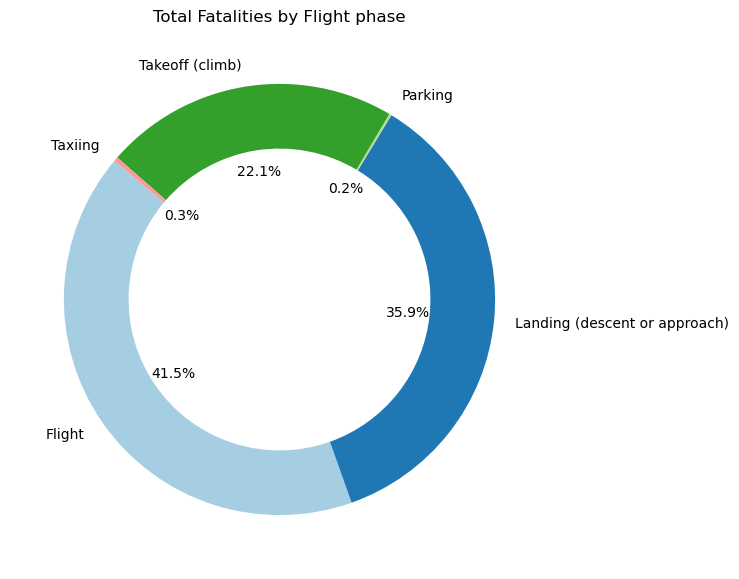

In [81]:
# Aggregate total fatalities by Region
flight_phase_fatalities = df.groupby('Flight phase')['Total fatalities'].sum()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(flight_phase_fatalities, 
        labels=flight_phase_fatalities.index,
        autopct='%1.1f%%',  # Display percentage
        colors=plt.cm.Paired(range(len(flight_phase_fatalities))),
        startangle=140,     # Rotate the start of the pie chart
        wedgeprops=dict(width=0.3))  # Use a donut shape if desired

# Add a title
plt.title('Total Fatalities by Flight phase')

# Show the plot
plt.show()

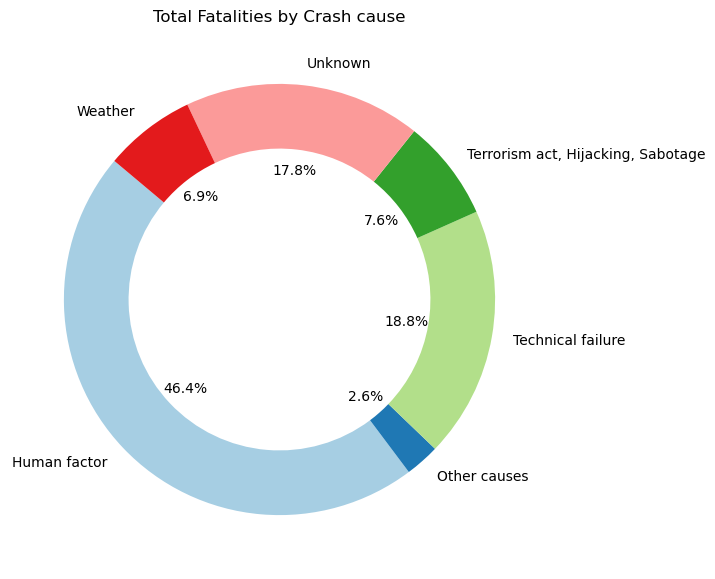

In [82]:
# Aggregate total fatalities by Region
Crash_cause_fatalities = df.groupby('Crash cause')['Total fatalities'].sum()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(Crash_cause_fatalities, 
        labels=Crash_cause_fatalities.index,
        autopct='%1.1f%%',  # Display percentage
        colors=plt.cm.Paired(range(len(Crash_cause_fatalities))),
        startangle=140,     # Rotate the start of the pie chart
        wedgeprops=dict(width=0.3))  # Use a donut shape if desired

# Add a title
plt.title('Total Fatalities by Crash cause')

# Show the plot
plt.show()

Pie charts are pretty straight forward we have one for Region, one for flight phase, and one for crash cause which are all done with respect to Total fatalities.

### -Extra info for data analysis

In [83]:
# Filter the DataFrame to include only rows where Crash Cause is "Technical failure"
tech_failure_df = df[df['Crash cause'] == 'Technical failure']

# Aggregate the data to get the count of Technical failures and sum of Total fatalities for each Aircraft
agg_result = tech_failure_df.groupby('Aircraft').agg(
    Technical_Failure_Count=('Crash cause', 'size'),  # Count occurrences
    Total_Fatalities_Sum=('Total fatalities', 'sum')  # Sum of fatalities
).reset_index()

# Get the top 10 Aircraft types based on Technical Failure Count
top_10_aircraft = agg_result.nlargest(10, 'Technical_Failure_Count')

# Display the result
top_10_aircraft



,Aircraft,Technical_Failure_Count,Total_Fatalities_Sum
306,Douglas C-47 Skytrain (DC-3),432,1903
243,Curtiss C-46 Commando,191,803
557,PZL-Mielec AN-2,179,85
49,Avro 652 Anson,123,79
316,Douglas DC-3,102,458
502,Lockheed C-130 Hercules,77,1280
571,Piper PA-31-310 Navajo,75,149
572,Piper PA-31-350 Navajo Chieftain,74,191
310,Douglas C-54 Skymaster,65,359
203,Cessna 402,62,102


This table basically shows the top 10 Aircrafts with technical failure with the total amount of fatalities associated for these technical failures.

In [84]:
# Filter the DataFrame to include only rows where Crash Cause is "Human factor"
human_factor_df = df[df['Crash cause'] == 'Human factor']

# Aggregate the data to get the count of Human factor occurrences and sum of Total fatalities for each Operator
agg_result = human_factor_df.groupby('Operator').agg(
    Human_Factor_Count=('Crash cause', 'size'),  # Count occurrences
    Total_Fatalities_Sum=('Total fatalities', 'sum')  # Sum of fatalities
).reset_index()

# Get the top 10 Operators based on Human Factor Count
top_10_operators = agg_result.nlargest(10, 'Human_Factor_Count')

# Display the result
top_10_operators


,Operator,Human_Factor_Count,Total_Fatalities_Sum
146,Aeroflot - Russian International Airlines,768,5806
3686,Royal Air Force - RAF,583,1866
4508,United States Air Force - USAF,303,2626
4511,United States Army Air Forces - USAAF,166,1349
4518,United States Navy - USN,126,989
3424,Private American,118,161
4042,Soviet Air Force - Voyenno-vozdushnye sily CCCP,60,742
3695,Royal Canadian Air Force - RCAF,45,204
3690,Royal Australian Air Force - RAAF,42,214
3709,Royal New Zealand Air Force - RNZAF,39,136


Here this table shows the top 10 Operators with the most human factors errors and the total fatalities for each Operator with respect to human factors.

# Data Manipulation

In [85]:
df = df.drop('Total fatalities', axis=1)
df

,Year,YOM,Region,Aircraft,Operator,Flight phase,Flight type,Crash cause,Crew on board,Pax on board,Total On Board,Crash Severity
0,1918,1918,North America,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),Test,Technical failure,2,0,2,Severe
1,1918,1918,Europe,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),Test,Technical failure,6,0,6,Severe
2,1918,1918,Africa,Avro 504,Royal Air Force - RAF,Flight,Training,Unknown,2,0,2,Severe
3,1918,1918,North America,De Havilland DH.4,United States Signal Corps - USSC,Flight,Military,Technical failure,1,0,1,Severe
5,1918,1918,Europe,Fairey III,Marine Aeroplane Depot,Landing (descent or approach),Delivery,Unknown,1,0,1,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022,1985,South America,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,Landing (descent or approach),Cargo,Unknown,2,0,2,Minor
28532,2022,1976,Central America,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,Flight,Private,Unknown,1,1,2,Severe
28533,2022,1965,North America,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Unknown,1,3,4,Minor
28534,2022,1979,Asia,De Havilland DHC-6 Twin Otter,Tara Air,Flight,Scheduled Revenue Flight,Human factor,3,19,22,Severe


Here the Total fatalities column is dropped after it is no longer needed since our tragget is the level of Crash Severity

### Class distribution of Crash severity

Class Distribution:
 Crash Severity
Severe      15230
Minor       11379
Moderate     1019
Name: count, dtype: int64


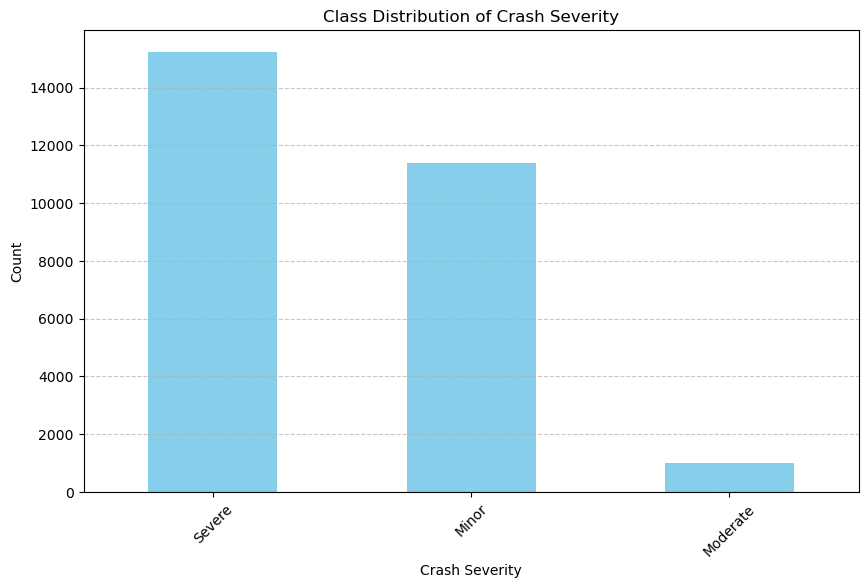

In [86]:
import pandas as pd
import matplotlib.pyplot as plt


# Check the distribution of the categorical column 'Crash Severity'
class_distribution = df['Crash Severity'].value_counts()
print("Class Distribution:\n", class_distribution)

# Plot the class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')

# Customize the plot
plt.xlabel('Crash Severity')
plt.ylabel('Count')
plt.title('Class Distribution of Crash Severity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



Here as we see the classes of the Crash severity are not balanced which if left unbalanced will lead to inaccurate  results so we need to balance the classes in order to get accurate results and in order for the machine not to lean towards one class over the other

### Resampling and balancing the class distribution

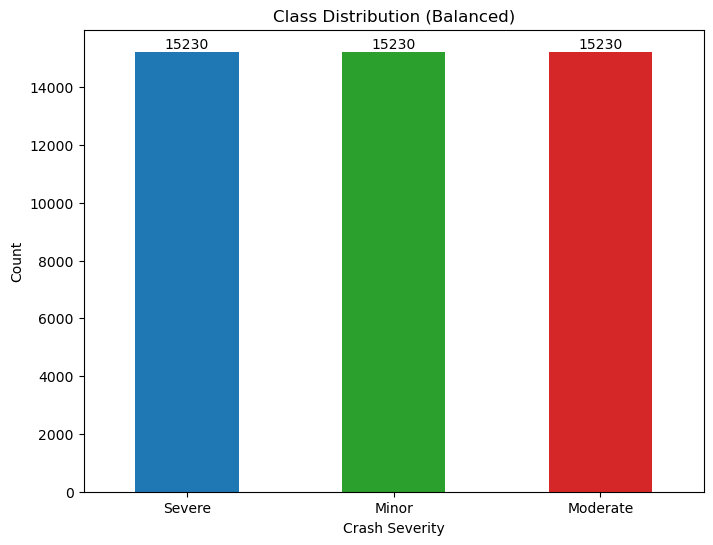

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Count occurrences of each class
class_distribution = df['Crash Severity'].value_counts()

# Find the maximum count among all classes (target for oversampling)
max_count = class_distribution.max()

# Oversample each class to the maximum count
oversampled_df_list = []
for class_label, count in class_distribution.items():
    class_df = df[df['Crash Severity'] == class_label]
    if count < max_count:
        # Oversample the class by sampling with replacement
        oversampled_class_df = class_df.sample(max_count, replace=True, random_state=42)
    else:
        oversampled_class_df = class_df
    oversampled_df_list.append(oversampled_class_df)

# Combine the oversampled data back into a DataFrame
df_oversampled = pd.concat(oversampled_df_list, ignore_index=True)

# Save the oversampled data to a CSV file
df_oversampled.to_csv('oversampled_data.csv', index=False)

# Count occurrences of each class after oversampling
balanced_class_distribution = df_oversampled['Crash Severity'].value_counts()

# Define colors for each class
colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e']  # Blue, Green, Red, Orange

# Plot class distribution
plt.figure(figsize=(8, 6))
balanced_class_distribution.plot(kind='bar', color=colors)
plt.title('Class Distribution (Balanced)')
plt.xlabel('Crash Severity')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add annotations with count values
for i, count in enumerate(balanced_class_distribution):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()



Here as we can see the classes of Crash Severity are balanced after resampling using over sampling technique which will have a big advantage in producing accurate results later on

### Encoding categorical features and putting them in a dictionary

In [88]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['Region', 'Aircraft', 'Operator', 'Flight phase', 'Flight type', 'Crash cause', 'Crash Severity']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a copy of the DataFrame to save the encoded data
df_encoded = df_oversampled.copy()

# Initialize an empty dictionary to store encodings
encoding_dicts = {}

# Encode the target variable 'Crash Severity' to numeric if it's not already
if df_encoded['Crash Severity'].dtype == 'object':
    df_encoded['Crash Severity'] = label_encoder.fit_transform(df_encoded['Crash Severity'])
    # Save the encoding for 'Crash Severity'
    encoding_dicts['Crash Severity'] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Define a function for target encoding
def target_encode(df, categorical_col, target_col):
    # Ensure the target column is numeric
    if pd.api.types.is_numeric_dtype(df[target_col]):
        # Calculate mean of the target variable for each category
        means = df.groupby(categorical_col)[target_col].mean()
        # Save the encoding to the dictionary
        encoding_dicts[categorical_col] = means.to_dict()
        # Map the means to the original column
        df[categorical_col + '_encoded'] = df[categorical_col].map(means)
    else:
        raise TypeError(f"The target column '{target_col}' must be numeric for target encoding.")
    return df

# Perform target encoding for Aircraft and Operator columns
for col in ['Aircraft', 'Operator']:
    if col in df_encoded.columns:
        # Perform target encoding
        df_encoded = target_encode(df_encoded, col, 'Crash Severity')
        # Drop the original column
        df_encoded = df_encoded.drop(columns=[col])
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

# Encode the rest of the categorical columns using LabelEncoder and store mappings
for col in categorical_columns:
    if col in df_encoded.columns and col not in ['Aircraft', 'Operator']:
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
            # Save the encoding to the dictionary
            encoding_dicts[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    elif col not in df_encoded.columns:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

Here the columns with categorical data are encoded. It is important to know that two types of encoding is being used:target encoding for columns with high amount of unique features or high cardinality which are (Aircraft :1118, and Operator :8954) so target encoding was the best option to use in order to produce accurate results later on and it simplifies the data for the machine learing stage, the rest of the columns with categorical features are encoded using label encoder. After encoding, all of the encoded data was put in a dictionary form to make it easier and less confusing for the machine to access  the encoded data later on in the machine learning stage or training stage

In [89]:
# Now df_encoded contains the encoded data, and encoding_dicts contains the mappings for later use
encoding_dicts

{'Crash Severity': {'Minor': 0, 'Moderate': 1, 'Severe': 2},
 'Aircraft': {'AAC.1 Toucan': 1.3,
  'ACAZ T.1': 0.0,
  'ATR42-200': 0.0,
  'ATR42-300': 0.9259259259259259,
  'ATR42-500': 0.8125,
  'ATR42-600': 0.0,
  'ATR72-200': 0.7368421052631579,
  'ATR72-500': 0.16666666666666666,
  'ATR72-600': 1.3333333333333333,
  'Aeritalia G.222': 0.9090909090909091,
  'Aero A.10': 0.6666666666666666,
  'Aero A.23': 0.0,
  'Aero C-3A': 1.5,
  'Aero DH.50': 0.0,
  'Aero Spacelines 377MGT Mini Guppy': 2.0,
  'Aeromarine 40': 2.0,
  'Aeromarine 75': 2.0,
  'Airbus A300': 0.5813953488372093,
  'Airbus A300-600': 1.1111111111111112,
  'Airbus A310': 1.24,
  'Airbus A319': 0.0,
  'Airbus A320': 0.9,
  'Airbus A321': 0.6666666666666666,
  'Airbus A330': 0.6,
  'Airbus A340-300': 0.0,
  'Airbus A340-600': 0.0,
  'Airbus A400M': 2.0,
  'Airspeed AS.10 Oxford': 1.0495049504950495,
  'Airspeed AS.5 Courier': 1.2,
  'Airspeed AS.57 Ambassador': 0.3076923076923077,
  'Airspeed AS.6 Envoy': 1.1111111111111112

### Correlation between target (Crash severity) and rest of the data columns

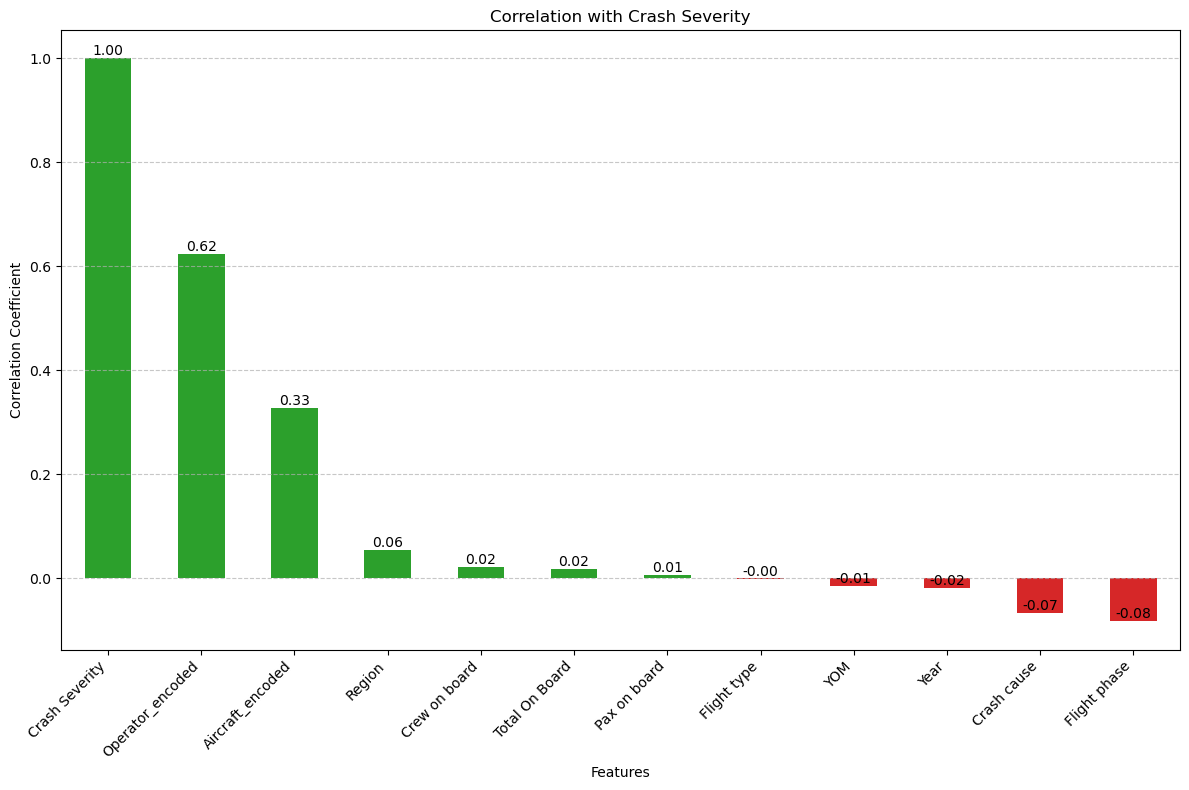

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Sort correlation coefficients with respect to 'Crash Severity'
Survived_correlation = correlation_matrix['Crash Severity'].sort_values(ascending=False)

# Define colors for positive and negative correlations
colors = ['#2ca02c' if c > 0 else '#d62728' for c in Survived_correlation]

# Plot correlation coefficients
plt.figure(figsize=(12, 8))
ax = Survived_correlation.plot(kind='bar', color=colors)
plt.title('Correlation with Crash Severity')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add correlation values as annotations
for index, value in enumerate(Survived_correlation):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


After encoding we wanna see the correlation between the Crash severity and the rest of the data columns which is a bit obvious the operator and aircraft are in the lead

In [91]:
# Extract and enumerate feature names and correlation values
sorted_correlation_list = [(f"{feature}: {correlation:.16f}") for feature, correlation in zip(Survived_correlation.index, Survived_correlation)]

# Display sorted list of correlation values
for i, correlation_value in enumerate(sorted_correlation_list, start=1):
    print(f"{i}. {correlation_value}")

1. Crash Severity: 1.0000000000000000
2. Operator_encoded: 0.6241926279353380
3. Aircraft_encoded: 0.3285480121514305
4. Region: 0.0551052439771107
5. Crew on board: 0.0217792007485507
6. Total On Board: 0.0187249829773118
7. Pax on board: 0.0065044904877373
8. Flight type: -0.0006187929470263
9. YOM: -0.0142420937730160
10. Year: -0.0183347449728089
11. Crash cause: -0.0668524435301954
12. Flight phase: -0.0825381370665702


In [92]:
# Original DataFrame column names
df_encoded.columns = ['Year', 'YOM', 'Region', 'Flight phase', 'Flight type', 'Crash cause', 
              'Crew on board', 'Pax on board', 'Total On Board', 'Crash Severity', 
              'Aircraft_encoded', 'Operator_encoded']

# Rename the columns by removing '_encoded'
df_encoded = df_encoded.rename(columns={'Aircraft_encoded': 'Aircraft', 'Operator_encoded': 'Operator'})

df_encoded

,Year,YOM,Region,Flight phase,Flight type,Crash cause,Crew on board,Pax on board,Total On Board,Crash Severity,Aircraft,Operator
0,1918,1918,5,3,28,2,2,0,2,2,0.747967,2.000000
1,1918,1918,4,3,28,2,6,0,6,2,0.666667,0.444444
2,1918,1918,0,0,30,4,2,0,2,2,0.627306,0.982555
3,1918,1918,5,0,18,2,1,0,1,2,0.747967,2.000000
4,1918,1918,4,1,8,4,1,0,1,2,1.142857,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
45685,1976,1973,4,1,10,0,1,5,6,1,1.185864,0.769231
45686,1948,1946,0,3,11,0,6,0,6,1,0.967213,1.019380
45687,1952,1944,2,0,3,3,13,0,13,1,1.206061,1.147777
45688,1973,1960,2,1,23,3,6,51,57,1,0.946565,1.009484


Here we just renamed the Aircraft_encoded and Operator_encoded to Aircraft and Operator to avoid confusion especially in the deployment satge

In [93]:
selected_features =['Region','Crew on board','Operator','Total On Board','Aircraft','YOM','Crash cause','Flight phase']

After seeing the correlation between Crash severity and the rest of the data column we selected all of the columns except: year and pax on board

### Scaling

In [94]:
from sklearn.preprocessing import StandardScaler

# Extract the features (X) and target variable (y)
X = df_encoded[selected_features]
y = df_encoded['Crash Severity']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled features
X_scaled_df

,Region,Crew on board,Operator,Total On Board,Aircraft,YOM,Crash cause,Flight phase
0,0.561893,-0.069644,1.962126,-0.346659,-0.939514,-0.012970,0.011642,1.585912
1,0.048086,0.077492,-1.090070,-0.252818,-1.242583,-0.012970,0.011642,1.585912
2,-2.007142,-0.069644,-0.034230,-0.346659,-1.389309,-0.012970,1.154359,-0.977906
3,0.561893,-0.106429,1.962126,-0.370119,-0.939514,-0.012970,0.011642,-0.977906
4,0.048086,-0.106429,1.962126,-0.370119,0.532536,-0.012970,1.154359,-0.123300
...,...,...,...,...,...,...,...,...
45685,0.048086,-0.106429,-0.452798,-0.252818,0.692854,0.178577,-1.131074,-0.123300
45686,-2.007142,0.077492,0.038026,-0.252818,-0.122221,0.084545,-1.131074,1.585912
45687,-0.979528,0.334982,0.289958,-0.088597,0.768142,0.077579,0.583001,-0.977906
45688,-0.979528,0.077492,0.018608,0.943649,-0.199193,0.133302,0.583001,-0.123300


Scaling is a must for a data, in which standar scaler is being used here

# Machine learing/ Training stage

In [95]:
# Split the scaled features and target variable into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [96]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score

# Define a list of classifiers
classifiers = [
    LogisticRegression(),
    RidgeClassifier(),
    LogisticRegressionCV(),
    DecisionTreeClassifier(),
    SVC(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    BernoulliNB(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('svc', SVC())
    ], voting='hard'),
    HistGradientBoostingClassifier(),
    NearestCentroid()
]

best_accuracy = 0
best_model = None

# Iterate over each classifier
for clf in classifiers:
    # Train the model on the training set
    clf.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the model name and accuracy
    print(f"Model: {clf.__class__.__name__}, Accuracy: {accuracy:.4f}")
    
    # Check if current model has higher accuracy than the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf

# Print the best model and its accuracy
print(f"Best Model: {best_model.__class__.__name__}, Accuracy: {best_accuracy:.4f}")


Model: LogisticRegression, Accuracy: 0.6745
Model: RidgeClassifier, Accuracy: 0.6232
Model: LogisticRegressionCV, Accuracy: 0.6760
Model: DecisionTreeClassifier, Accuracy: 0.8968
Model: SVC, Accuracy: 0.7611
Model: RandomForestClassifier, Accuracy: 0.9174
Model: GradientBoostingClassifier, Accuracy: 0.7981
Model: KNeighborsClassifier, Accuracy: 0.8495
Model: GaussianNB, Accuracy: 0.5755
Model: BernoulliNB, Accuracy: 0.5825
Model: ExtraTreesClassifier, Accuracy: 0.9243
Model: AdaBoostClassifier, Accuracy: 0.7666
Model: VotingClassifier, Accuracy: 0.8037
Model: HistGradientBoostingClassifier, Accuracy: 0.8571
Model: NearestCentroid, Accuracy: 0.6463
Best Model: ExtraTreesClassifier, Accuracy: 0.9243





Here the code test which classifiers or training model is the best for the current data in question taking into consideration what the target is (Crash severity) and it displays the accuracing of each classifier or trainer 

## Classification Report:

In [97]:
class_labels = ['Sever', 'Minor','Moderate']

# Predict the price range on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

       Sever       0.89      0.90      0.89      3000
       Minor       0.97      1.00      0.99      3069
    Moderate       0.90      0.88      0.89      3069

    accuracy                           0.92      9138
   macro avg       0.92      0.92      0.92      9138
weighted avg       0.92      0.92      0.92      9138



As we can see the precision for every class is predominantly great

## Confusion Matrix:

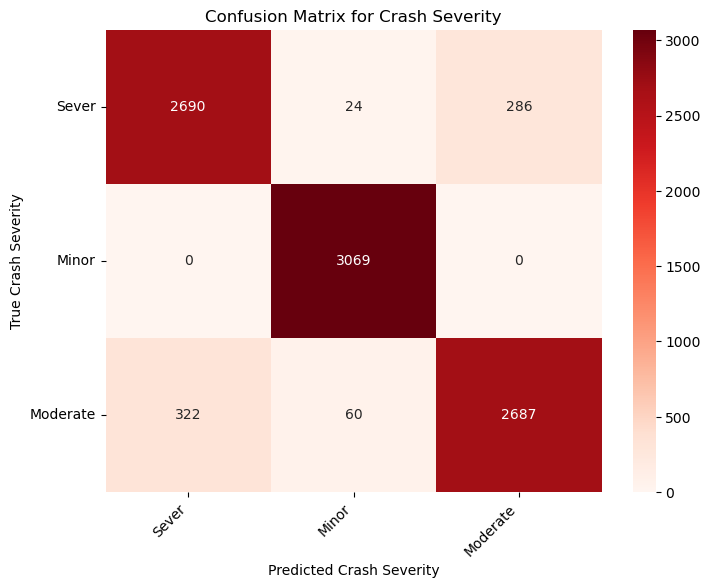

In [98]:
# Predict the price range on the testing set
y_pred = best_model.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with Seaborn heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

# Adjust spacing between axis titles and class labels
heatmap.set_xticklabels(class_labels, rotation=45, ha='right')
heatmap.set_yticklabels(class_labels, rotation=0)

plt.title('Confusion Matrix for Crash Severity')
plt.xlabel('Predicted Crash Severity')
plt.ylabel('True Crash Severity')
plt.show()

The confusion matrix show dark colors on the diagonal which is always a great sign of accuracy

## Hyperparameter Tuning: 

In [99]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for ExtraTreesClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the GridSearchCV object with ExtraTreesClassifier and the parameter grid
grid_search = GridSearchCV(estimator=ExtraTreesClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2, 
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best model based on the grid search
best_grid_model = grid_search.best_estimator_

# Predict the crash severity on the testing set using the best model
y_pred_best = best_grid_model.predict(X_test)

# Evaluate the best model
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best, target_names=class_labels))

# Print the accuracy of the best model
best_accuracy_tuned = accuracy_score(y_test, y_pred_best)
print(f"Best Tuned Model Accuracy: {best_accuracy_tuned:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report for Best Model:
              precision    recall  f1-score   support

       Sever       0.90      0.90      0.90      3000
       Minor       0.97      1.00      0.99      3069
    Moderate       0.91      0.88      0.89      3069

    accuracy                           0.93      9138
   macro avg       0.93      0.93      0.93      9138
weighted avg       0.93      0.93      0.93      9138

Best Tuned Model Accuracy: 0.9266


Trying to optimize the model was being done even though it didnt make that much of a difference

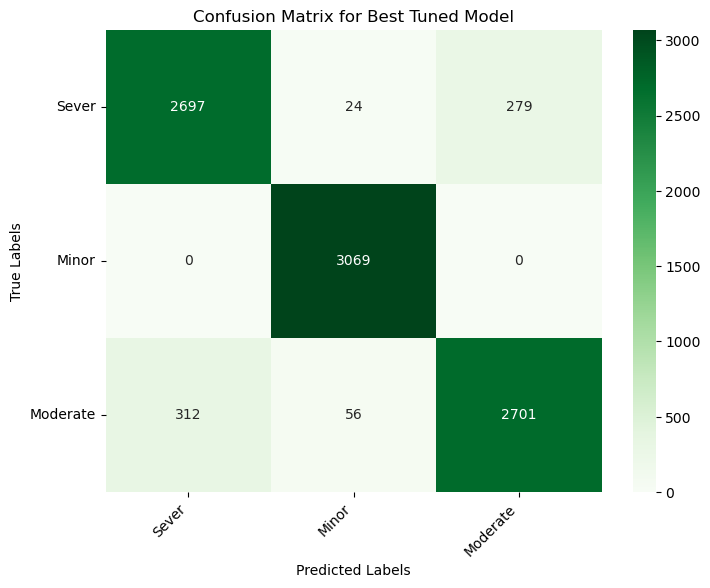

In [100]:
# Get the confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix with Seaborn heatmap
plt.figure(figsize=(8, 6))
heatmap_best = sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')

# Adjust spacing between axis titles and class labels
heatmap_best.set_xticklabels(class_labels, rotation=45, ha='right')
heatmap_best.set_yticklabels(class_labels, rotation=0)

plt.title('Confusion Matrix for Best Tuned Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Deployment: ( Prediction Function - Classify a new crash severity)

In [101]:
# Function to encode inputs based on encoding dictionaries
def encode_input(input_data, encoding_dicts):
    encoded_input = {}
    for col, value in input_data.items():
        if col in encoding_dicts:
            if value in encoding_dicts[col]:
                encoded_input[col] = encoding_dicts[col][value]
            else:
                print(f"Warning: Value '{value}' not found in encoding dictionary for column '{col}'. Using default.")
                encoded_input[col] = 0  # Default to 0 or some other strategy for unknown values
        else:
            encoded_input[col] = value  # Non-encoded columns (numerical values)
    return encoded_input


In [102]:
# Function to scale and predict
def make_prediction(user_input, selected_features, encoding_dicts, scaler, model):
    # Encode the input
    encoded_input = encode_input(user_input, encoding_dicts)

    # Reorder and create a DataFrame for the model
    input_df = pd.DataFrame([encoded_input], columns=selected_features)

    # Scale the input features
    input_scaled = scaler.transform(input_df)

    # Make the prediction
    prediction = model.predict(input_scaled)
    
    # Get prediction probabilities
    prediction_proba = model.predict_proba(input_scaled)

    # Return the predicted crash severity and probability
    severity_mapping = {0: 'Minor', 1: 'Moderate', 2: 'Severe'}
    predicted_severity = severity_mapping.get(prediction[0], 'Unknown')

    # Get the probability for the predicted class
    predicted_class_proba = prediction_proba[0][prediction[0]]

    return predicted_severity, predicted_class_proba


In [103]:
def get_user_input():
    print("Enter details for the crash prediction:")
    
    # Capture user inputs for each feature
    region = input("Region: ")
    crew_on_board = int(input("Crew on board: "))
    pax_on_board = int(input("Pax on board: "))  # New input for Pax on board
    operator = input("Operator: ")
    aircraft = input("Aircraft: ")
    yom = int(input("Year of Manufacture (YOM): "))
    crash_cause = input("Crash cause: ")
    flight_phase = input("Flight phase: ")

    # Calculate total on board
    total_on_board = crew_on_board + pax_on_board

    # Create a dictionary with user inputs
    user_input = {
        'Region': region,
        'Crew on board': crew_on_board,
        'Pax on board': pax_on_board,  # Adding Pax on board to the dictionary
        'Total On Board': total_on_board,
        'Operator': operator,
        'Aircraft': aircraft,
        'YOM': yom,
        'Crash cause': crash_cause,
        'Flight phase': flight_phase
    }

    return user_input

# Main function to run the CLI
def main():
    # Get user input
    user_input = get_user_input()

    # Perform prediction using the best_model and selected features
    result, proba = make_prediction(user_input, selected_features, encoding_dicts, scaler, best_model)
    
    # Convert probability to percentage and print the result in the required format
    confidence_score = proba * 100
    print(f"\nPredicted Crash Severity: {result} with {confidence_score:.0f}% as a confidence score")
    
    # Print additional message based on the result
    if result == "Severe":
        print("meaning more than 25% of the Souls on board have died from the crash.")
    elif result == "Moderate":
        print("meaning less than 25% of the Souls on board have died.")
    elif result == "Minor":
        print("no Souls were lost.")

if __name__ == "__main__":
    main()

       

Enter details for the crash prediction:


Region:  Europe
Crew on board:  3
Pax on board:  19
Operator:  Tara Air
Aircraft:  De Havilland DHC-6 Twin Otter
Year of Manufacture (YOM):  1979
Crash cause:  Human factor
Flight phase:  Flight



Predicted Crash Severity: Severe with 99% as a confidence score
meaning more than 25% of the Souls on board have died from the crash.


i have build a multi-class classification machine learning model where it predicts the crash severity and it classifies the crash as : Minor, Moderate, sever. the best classifier for the model is ExtraTreesClassifier and after tunning the model the models accuracy was increased under best_accuracy_tune

# Save the model:

In [104]:
import joblib

# Save the model
joblib.dump(best_model, 'clf.pkl')

# Similarly, save the scaler and encoding dictionaries
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoding_dicts, 'encoding_dicts.pkl')

['encoding_dicts.pkl']